In [4]:
import openai
import os
import importlib.util
import sys
from os import walk
import json
import pandas as pd

pd.set_option( "display.width", 512)
pd.set_option( "display.max_columns", 6 )
# import sys
# import datetime as dt

In [5]:
import datetime as dt
import os

# from lib import util as du


class Stopwatch:

    def __init__( self ):

        self.start_time = dt.datetime.now()

    def print( self, msg=None, prepend_nl=False, end="\n\n", use_millis=False ):

        """
        Prints time elapsed since instantiation

        If more than 1 minute has passed it uses "mm:ss" format.  Otherwise, it just prints seconds

        ¡OJO!/NOTE: This is fairly simpleminded, it's probably more accurate to use timeit

        :param msg: Text to the output before elapsed time is reported

        :param prepend_nl: Insert a new line before printing to the console, defaults to False

        :param end: Optional text to append to the end of the output, similar to how print works in the standard library.  Defaults to two carriage turns

        :param use_millis: Dump elapsed time in milliseconds to the console. Faults to False

        :return: None, Prince to console only
        """

        seconds = (dt.datetime.now() - self.start_time).seconds

        # check msg argument
        if msg is None: msg = "Finished"

        # preformat output
        if prepend_nl: print()

        if use_millis:

            # From: https://stackoverflow.com/questions/766335/python-speed-testing-time-difference-milliseconds
            delta = dt.datetime.now() - self.start_time
            millis = int( delta.total_seconds() * 1000 )

            print( "{0} in {1:,} ms".format( msg, millis ), end=end )

        elif seconds > 59:

            # From: https://stackoverflow.com/questions/775049/how-do-i-convert-seconds-to-hours-minutes-and-seconds
            minutes, seconds = divmod( seconds, 60 )
            print( "{0} in {1:02d}:{2:02d}".format( msg, minutes, seconds ), end=end )

        else:
            print( "{0} in {1:,} seconds".format( msg, seconds ), end=end )

    def get_delta( self ):

        """
        Calculate the delta between now and when this object was instantiated

        :return: Time delta in milliseconds
        """

        delta = dt.datetime.now() - self.start_time
        millis = int( delta.total_seconds() * 1000 )

        return millis


In [21]:
timer = Stopwatch()
timer.print( "Finished doing foo", use_millis=True )

Finished doing foo in 0 ms



In [8]:
# From: https://stackoverflow.com/questions/67631/how-can-i-import-a-module-dynamically-given-the-full-path

def import_module( path ):

    print( " loading {}... ".format( path ) )
    spec = importlib.util.spec_from_file_location( "module.name", path )
    mod = importlib.util.module_from_spec( spec )
    sys.modules[ "module.name" ] = mod
    spec.loader.exec_module( mod )

    return mod
# du =
lib_path = "/var/genie-in-the-box/src/lib"

du = import_module( lib_path + "/util.py" )

du.print_banner( "foo" )


 loading /var/genie-in-the-box/src/lib/util.py... 
------------------------------------------------------------------------------------------------------------------------
- foo
------------------------------------------------------------------------------------------------------------------------



In [26]:
! ls -alh /var/genie-in-the-box/src/lib/util_stopwatch.py

-rw-rw-r-- 1 1000 1000 2.7K Jun 19 17:08 /var/genie-in-the-box/src/lib/util_stopwatch.py


In [8]:
def import_sw( path ):

    print( " loading {}... ".format( path ) )
    spec = importlib.util.spec_from_file_location( "module.name", path )
    mod = importlib.util.module_from_spec( spec )
    sys.modules[ "module.name" ] = mod
    spec.loader.exec_module( mod )

    return mod

sw = import_sw( lib_path + "/util_stopwatch.py" )
sw


 loading /var/genie-in-the-box/src/lib/util_stopwatch.py... 


ModuleNotFoundError: No module named 'lib'

In [9]:
# sw = import_sw( lib_path + "/util_stopwatch.py" )
bar = import_sw( lib_path + "/util.py" )
bar.print_banner( "foo" )

 loading /var/genie-in-the-box/src/lib/util.py... 
------------------------------------------------------------------------------------------------------------------------
- foo
------------------------------------------------------------------------------------------------------------------------



In [11]:
sys.path.append( "/var/genie-in-the-box/src/lib" )

In [7]:
du = importlib.import_module( "util" )
du.print_banner( "foo" )

ModuleNotFoundError: No module named 'util'

In [16]:
timer = Stopwatch()
timer.print( "Finished doing foo", use_millis=True )

Finished doing foo in 0 ms



In [9]:
path = "/var/genie-in-the-box/src/prompts/data"

def get_training_data_paths( path ):

    # From: https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
    filenames = next( walk( path ), ( None, None, [ ] ) )[ 2 ]
    paths     = [ ]
    for filename in filenames:

        if filename.startswith( "synthetic-data-" ) and filename.endswith( ".txt" ):
            paths.append( path + "/" + filename )
            print( filename )

    paths.sort()
    return paths

training_data_paths = get_training_data_paths( path )
training_data_paths

synthetic-data-search-google-in-new-tab.txt
synthetic-data-search-in-new-tab.txt
synthetic-data-search-google-scholar-in-new-tab.txt
synthetic-data-search-google-in-current-tab.txt
synthetic-data-load-url-in-current-tab.txt
synthetic-data-load-url-new-tab.txt
synthetic-data-search-in-current-tab.txt
synthetic-data-search-google-scholar-in-current-tab.txt


['/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-in-current-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-new-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-current-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-new-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-scholar-in-current-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-scholar-in-new-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-in-current-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-in-new-tab.txt']

In [10]:
def get_training_commands_maps( path ):

    vox_filename_to_completion_text = du.get_file_as_dictionary( path, debug=True, lower_case=True )

    # Now, flip the dictionary so that the completion text is the key and the filename is the value
    vox_completion_text_to_filename = { v: k for k, v in vox_filename_to_completion_text.items() }

    return vox_filename_to_completion_text, vox_completion_text_to_filename

vox_filename_to_completion_text_dict, vox_completion_text_to_filename = get_training_commands_maps(
    path =du.get_project_root() + "/src/prompts/data/training-commands.map"
)

print( vox_filename_to_completion_text_dict )
vox_completion_text_to_filename

{'synthetic-data-search-in-new-tab.txt': 'search new tab', 'synthetic-data-search-in-current-tab.txt': 'search current tab', 'synthetic-data-search-google-in-new-tab.txt': 'search google new tab', 'synthetic-data-search-google-in-current-tab.txt': 'search google current tab', 'synthetic-data-search-google-scholar-in-new-tab.txt': 'search google scholar new tab', 'synthetic-data-search-google-scholar-in-current-tab.txt': 'search google scholar current tab', 'synthetic-data-load-url-new-tab.txt': 'open new tab', 'synthetic-data-load-url-in-current-tab.txt': 'in current tab'}


{'search new tab': 'synthetic-data-search-in-new-tab.txt',
 'search current tab': 'synthetic-data-search-in-current-tab.txt',
 'search google new tab': 'synthetic-data-search-google-in-new-tab.txt',
 'search google current tab': 'synthetic-data-search-google-in-current-tab.txt',
 'search google scholar new tab': 'synthetic-data-search-google-scholar-in-new-tab.txt',
 'search google scholar current tab': 'synthetic-data-search-google-scholar-in-current-tab.txt',
 'open new tab': 'synthetic-data-load-url-new-tab.txt',
 'in current tab': 'synthetic-data-load-url-in-current-tab.txt'}

In [11]:
def get_vox_commands( command_paths, command_map ):

    vox_command_dfs = {}

    for path in command_paths:

        print( "Loading [{}]...".format( path ) )
        commands = du.get_file_as_list( path, clean=True, lower_case=False )
        print( "Loaded [{}] commands".format( len( commands ) ) )

        # instantiate data frame with commands list
        vox_command_df = pd.DataFrame( commands, columns = [ "prompt" ] )

        # Fetch the completion text from the command map
        file_name      = path.split( "/" )[ -1 ]
        print( "file_name [{}]".format( file_name ) )
        vox_command_df[ "completion" ] = command_map[ file_name ]

        # Get the completion text
        completion_text = command_map[ file_name ]
        print( "completion_text [{}]".format( completion_text ) )

        # Check to see if 1st commands text contains DOMAIN_NAME constant
        if "DOMAIN_NAME" in commands[ 0 ]:

            print( "commands [{}] contains DOMAIN_NAME...".format( file_name ) )
            vox_command_df[ "args" ] = du.generate_domain_names( len( commands ) )

            # Replace domain name constant with domain names
            vox_command_df[ "prompt" ] = vox_command_df.apply( lambda row: row[ "prompt" ].replace( "DOMAIN_NAME", str( row[ "args" ] ) ), axis=1 )

            # append domain name to the end of completion
            # vox_command_df[ "completion" ] = vox_command_df.apply( lambda x: x[ "completion" ] + " " + str( x[ "domain_name" ] ), axis=1 )

        # Check to see if commands text contains SEARCH_TERMS constant
        if "SEARCH_TERMS" in commands[ 0 ]:

            print( "commands [{}] contains SEARCH_TERMS...".format( file_name ) )
            vox_command_df[ "args" ] = du.get_search_terms( len( commands ) )
            vox_command_df[ "prompt" ] = vox_command_df.apply( lambda row: row[ "prompt" ].replace( "SEARCH_TERMS", str( row[ "args" ] ) ), axis=1 )

        # append freshly minted data frame to the list
        vox_command_dfs[ completion_text ] = vox_command_df

        print()

    return vox_command_dfs

vox_command_dfs = get_vox_commands( training_data_paths, vox_filename_to_completion_text_dict )
# vox_command_dfs[ "in current tab" ]

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-in-current-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-load-url-in-current-tab.txt]
completion_text [in current tab]
commands [synthetic-data-load-url-in-current-tab.txt] contains DOMAIN_NAME...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-new-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-load-url-new-tab.txt]
completion_text [open new tab]
commands [synthetic-data-load-url-new-tab.txt] contains DOMAIN_NAME...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-current-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-search-google-in-current-tab.txt]
completion_text [search google current tab]
commands [synthetic-data-search-google-in-current-tab.txt] contains SEARCH_TERMS...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-new-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-

In [13]:
vox_command_dfs[ "search current tab" ]

prompt          completion                                args
0         Seek how does a car engine work? in this tab  search current tab         how does a car engine work?
1    Show what is climate change? search outcome in...  search current tab             what is climate change?
2      Look up what are the benefits of exercise? here  search current tab  what are the benefits of exercise?
3    Current tab: Search and display results for ho...  search current tab             how to make pizza dough
4    Research what is the meaning of success? and p...  search current tab     what is the meaning of success?
..                                                 ...                 ...                                 ...
195              Delve into surge terms in this window  search current tab                  healthy meal ideas
196             Search for starch terms in this window  search current tab  JavaScript libraries for beginners
197           Find starch terms results in current tub  search current tab                   alternative music
198                   Discover surge terms in this tub  search current tab                  how to lose weight
199                     Get surge terms in current tub  search current tab                     new car reviews

[200 rows x 3 columns]

In [12]:
# update list of data frames
vox_command_dfs = get_vox_commands( training_data_paths, vox_filename_to_completion_text_dict )

# concatenate data frames
vox_command_df = pd.concat( vox_command_dfs )
vox_command_df.shape

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-in-current-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-load-url-in-current-tab.txt]
completion_text [in current tab]
commands [synthetic-data-load-url-in-current-tab.txt] contains DOMAIN_NAME...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-new-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-load-url-new-tab.txt]
completion_text [open new tab]
commands [synthetic-data-load-url-new-tab.txt] contains DOMAIN_NAME...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-current-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-search-google-in-current-tab.txt]
completion_text [search google current tab]
commands [synthetic-data-search-google-in-current-tab.txt] contains SEARCH_TERMS...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-new-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-

(1600, 3)

In [13]:
def format_df( df ):
    # Get categorical values.
    df[ "completion_categorical" ] = pd.factorize( df[ "completion" ] )[ 0 ]

    # Rename columns
    df.rename( columns={ "completion": "completion_text", "completion_categorical": "completion" }, inplace=True )

    # Add leading space per instructions
    df[ "completion" ] = " " + df[ "completion" ].astype( str )

    # Insert hash marks and space according to these instructions below
    # https://community.openai.com/t/gpt3-finetuning-for-multilabel-classification/19105/5
    df[ "prompt"     ] = df[ "prompt" ] + "\n\n###\n\n"
    df[ "completion" ] = df[ "completion" ].astype( str )

    # Display the head
    return  df

formatted_df = format_df( vox_command_df.copy() )
formatted_df.head()


prompt completion_text                         args completion
in current tab 0  Load stage.excitingmango.info right here in th...  in current tab     stage.excitingmango.info          0
               1  Go straight to login.beautifulapple.gov in thi...  in current tab     login.beautifulapple.gov          0
               2  Please navigate to stage.incredibledolphin.gov...  in current tab  stage.incredibledolphin.gov          0
               3  Get beta.excitingbanana.com up on the screen i...  in current tab      beta.excitingbanana.com          0
               4  Put up spectacularpenguin.net in the current t...  in current tab       spectacularpenguin.net          0

In [52]:
formatted_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1600 entries, ('in current tab', 0) to ('search new tab', 199)
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prompt           1600 non-null   object
 1   completion_text  1600 non-null   object
 2   args             1600 non-null   object
 3   completion       1600 non-null   object
dtypes: object(4)
memory usage: 119.7+ KB


In [80]:
cols = [ "completion", "completion_text" ]
summary_df = formatted_df[ cols ].copy()
summary_df.drop_duplicates( inplace=True )
summary_df.reset_index( drop=True, inplace=True )
# summary_df[ "completion" ] = summary_df[ "completion" ].astype( int )
# summary_dict = summary_df.groupby( "completion_text" )[ "completion" ].to_dict()
# summary_df[ "completion" ] = summary_df[ "completion" ].astype( int )
#
# summary_df[ cols ].to_dict()
# summary_df.to_dict()
# summary_dict
print( summary_df[ "completion_text" ] )

0                       in current tab
1                         open new tab
2            search google current tab
3                search google new tab
4    search google scholar current tab
5        search google scholar new tab
6                   search current tab
7                       search new tab
Name: completion_text, dtype: object


In [15]:
json_path = "/var/genie-in-the-box/src/prompts/data/jsonl/batch-04.jsonl"
formatted_df.to_json( json_path, orient='records', lines=True )


In [16]:
! openai tools fine_tunes.prepare_data -f /var/genie-in-the-box/src/prompts/data/jsonl/batch-04.jsonl -q

Analyzing...

- Your file contains 1600 prompt-completion pairs
- The input file should contain exactly two columns/keys per row. Additional columns/keys present are: ['completion_text', 'args']
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- All prompts end with suffix `\n\n###\n\n`

Based on the analysis we will perform the following actions:
- [Necessary] Remove additional columns/keys: ['completion_text', 'args']
- [Recommended] Would you like to split into training and validation set? [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified files to `/var/genie-in-the-box/src/prompts/data/jsonl/batch-04_prepared_train.jsonl` and `/var/genie-in-the-box/src/prompts/data/jsonl/batch-04

In [17]:
! openai api fine_tunes.create -t "/var/genie-in-the-box/src/prompts/data/jsonl/batch-04_prepared_train.jsonl" -v "/var/genie-in-the-box/src/prompts/data/jsonl/batch-04_prepared_valid.jsonl" --compute_classification_metrics --classification_n_classes 8 -m ada

Upload progress: 100%|███████████████████████| 122k/122k [00:00<00:00, 270Mit/s]
Uploaded file from /var/genie-in-the-box/src/prompts/data/jsonl/batch-04_prepared_train.jsonl: file-rtSyKyWagrzxGb7eDMZWAHnk
Upload progress: 100%|████████████████████| 30.7k/30.7k [00:00<00:00, 23.2Mit/s]
Uploaded file from /var/genie-in-the-box/src/prompts/data/jsonl/batch-04_prepared_valid.jsonl: file-XB91SMkvAdyuYQ0ZiLtzvgBS
Created fine-tune: ft-wc5GJU9sIlyhrtw9kf3SRg0E
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-07-10 18:37:38] Created fine-tune: ft-wc5GJU9sIlyhrtw9kf3SRg0E



In [28]:
!openai api fine_tunes.follow -i ft-wc5GJU9sIlyhrtw9kf3SRg0E

[2023-07-10 18:37:38] Created fine-tune: ft-wc5GJU9sIlyhrtw9kf3SRg0E
[2023-07-10 22:57:27] Fine-tune costs $0.04
[2023-07-10 22:57:27] Fine-tune enqueued. Queue number: 12
[2023-07-10 22:57:31] Fine-tune is in the queue. Queue number: 11
[2023-07-10 22:57:50] Fine-tune is in the queue. Queue number: 10
[2023-07-10 22:58:24] Fine-tune is in the queue. Queue number: 9
[2023-07-10 23:01:18] Fine-tune is in the queue. Queue number: 8
[2023-07-10 23:02:03] Fine-tune is in the queue. Queue number: 7
[2023-07-10 23:02:22] Fine-tune is in the queue. Queue number: 6
[2023-07-10 23:02:57] Fine-tune is in the queue. Queue number: 5
[2023-07-10 23:02:58] Fine-tune is in the queue. Queue number: 4
[2023-07-10 23:03:52] Fine-tune is in the queue. Queue number: 3
[2023-07-10 23:06:59] Fine-tune is in the queue. Queue number: 2
[2023-07-10 23:09:23] Fine-tune is in the queue. Queue number: 1
[2023-07-10 23:20:16] Fine-tune is in the queue. Queue number: 0
[2023-07-10 23:21:51] Fine-tune started
[2023-

In [29]:
! openai api completions.create -m ada:ft-deepily-2023-07-10-23-39-03 -p "computer take me to npr.org"

computer take me to npr.org in the current tab

###

 0 0 0 0 0 0 0 0

In [32]:
du.get_project_root()

'/var/genie-in-the-box'

In [33]:
!openai api fine_tunes.results -i ft-wc5GJU9sIlyhrtw9kf3SRg0E > /var/genie-in-the-box/src/prompts/data/fine-tuning-results/ft-deepily-2023-07-10-23-39-03.csv

In [34]:
import pandas as pd

In [35]:
results = pd.read_csv( "/var/genie-in-the-box/src/prompts/data/fine-tuning-results/ft-deepily-2023-07-10-23-39-03.csv" )
results[ results[ "classification/accuracy" ].notnull() ].tail( 1 )

step  elapsed_tokens  elapsed_examples  ...  validation_token_accuracy  classification/accuracy  classification/weighted_f1_score
2561  2562          117812              5124  ...                        NaN                 0.996875                           0.99687

[1 rows x 11 columns]

<AxesSubplot:>

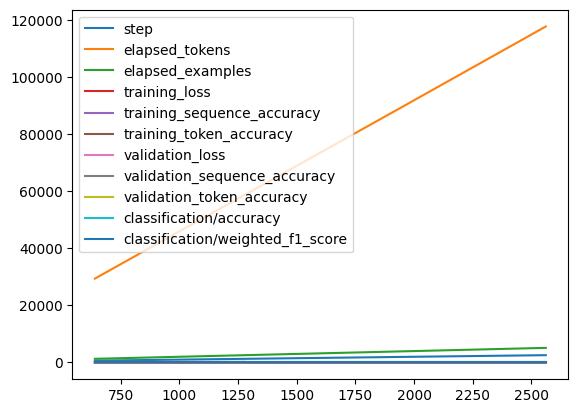

In [36]:
results[ results[ "classification/accuracy" ].notnull() ].plot()

In [37]:
results[ results[ "classification/accuracy" ].notnull() ].plot( x="iteration", y="classification/accuracy" )

KeyError: 'iteration'

In [38]:
vox_command_df.head()

prompt      completion                         args
in current tab 0  Load stage.excitingmango.info right here in th...  in current tab     stage.excitingmango.info
               1  Go straight to login.beautifulapple.gov in thi...  in current tab     login.beautifulapple.gov
               2     Please navigate to stage.incredibledolphin.gov  in current tab  stage.incredibledolphin.gov
               3  Get beta.excitingbanana.com up on the screen i...  in current tab      beta.excitingbanana.com
               4   Put up spectacularpenguin.net in the current tab  in current tab       spectacularpenguin.net